In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
data = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# missing values 
# duplicate
# outlier (boxplot)
# unique 
# countplot 
# histplot 
# label encoding 



In [5]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
cat_var = [] # categorical variable 
num_var = [] #numerical variable 
for i in data.columns:
    if data[i].nunique() < 5:
        cat_var.append(i)
    else: 
        num_var.append(i)
        
        
        

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 


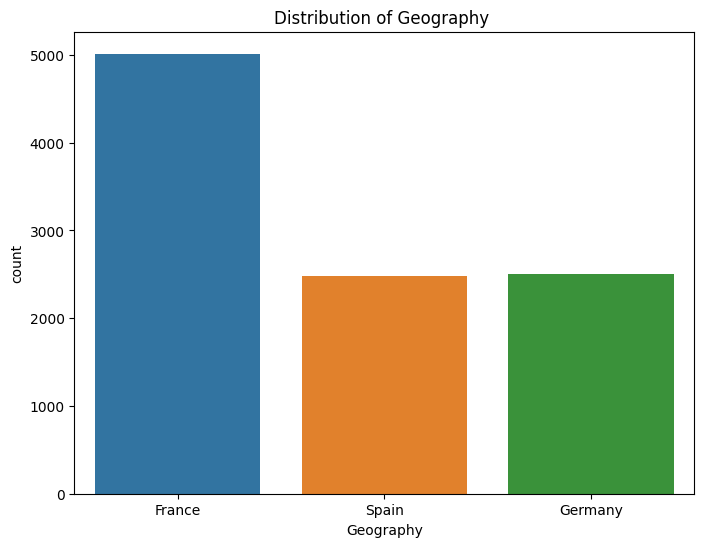

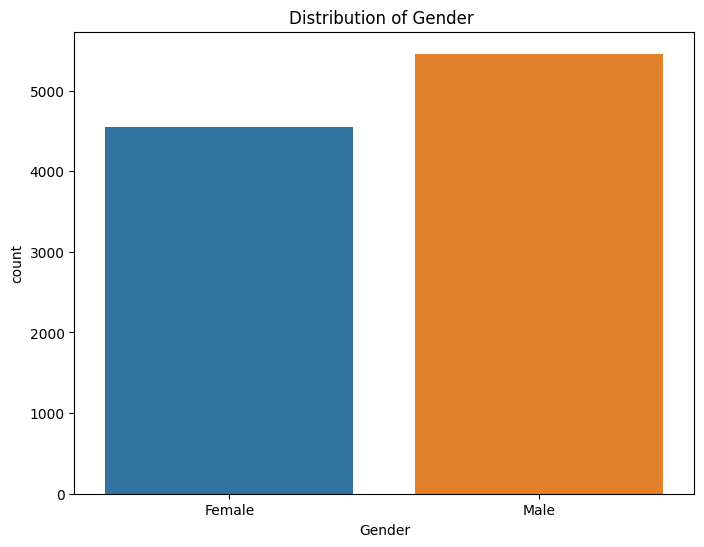

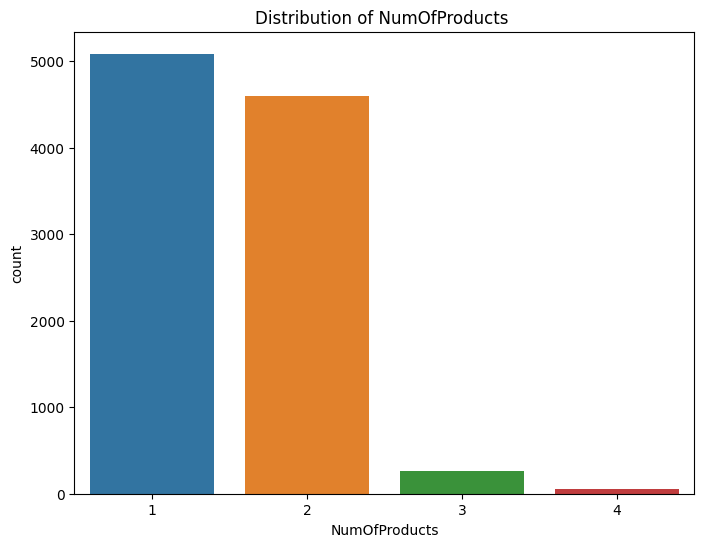

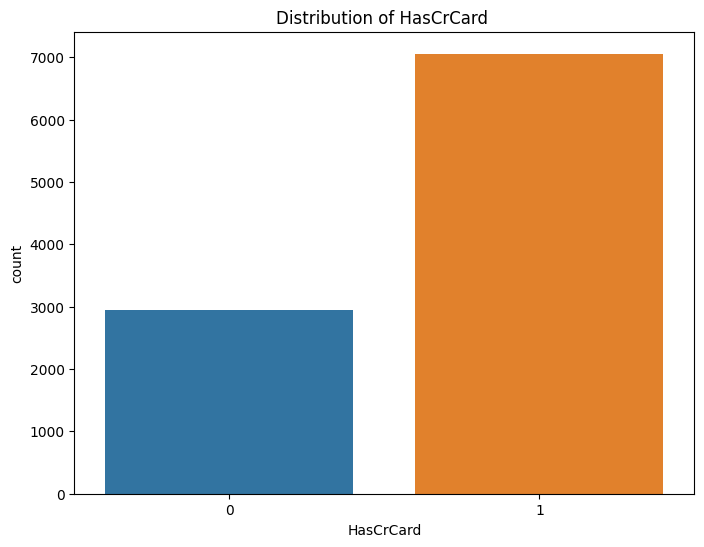

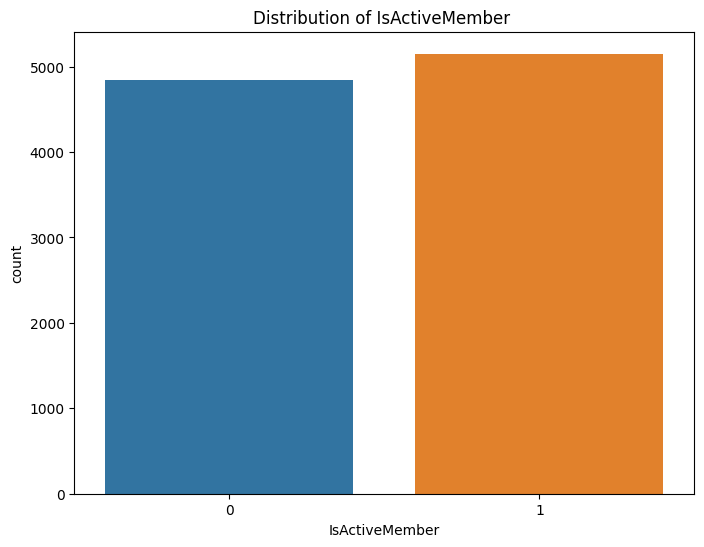

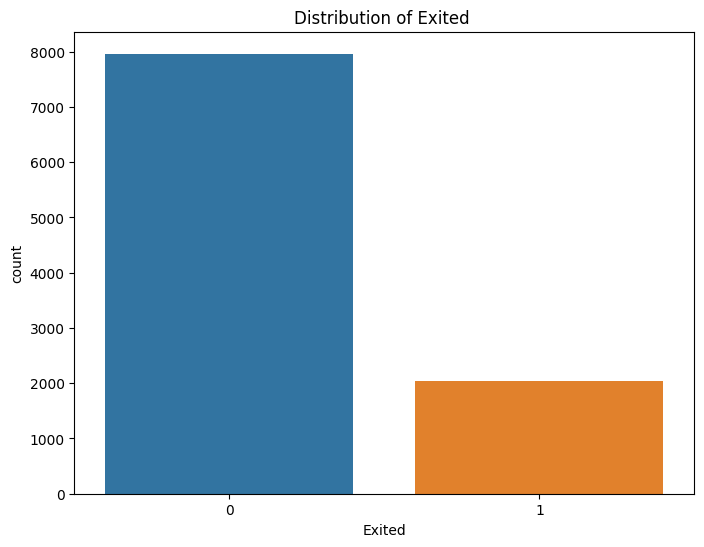

In [8]:
for i in cat_var:
    plt.figure(figsize = (8,6))
    plt.title(f'Distribution of {i} ')
    sns.countplot(data = data , x = i)
    plt.show()

In [9]:
copy_data = data.copy()

Exploratory Data Analysis <br>
Data Preprocessing <br>
Feature Scaling <br>
Feature Selection <br>
Model Selection <br>
reasoning things why you choose this model <br>
accuracy and effiency <br>
desired prediction 

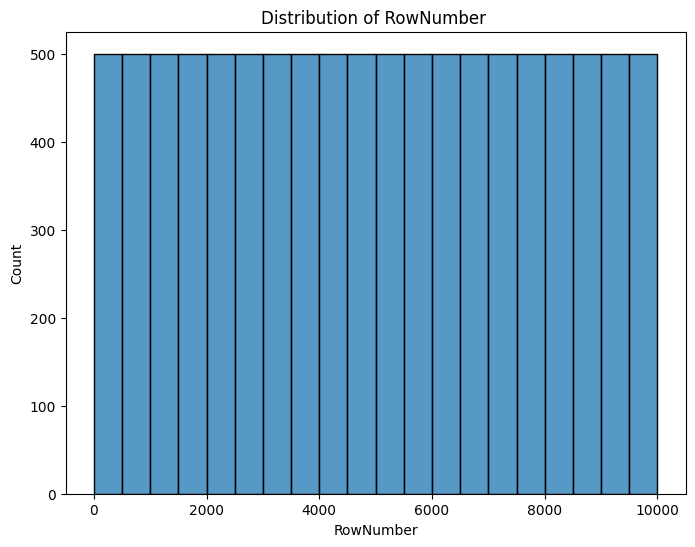

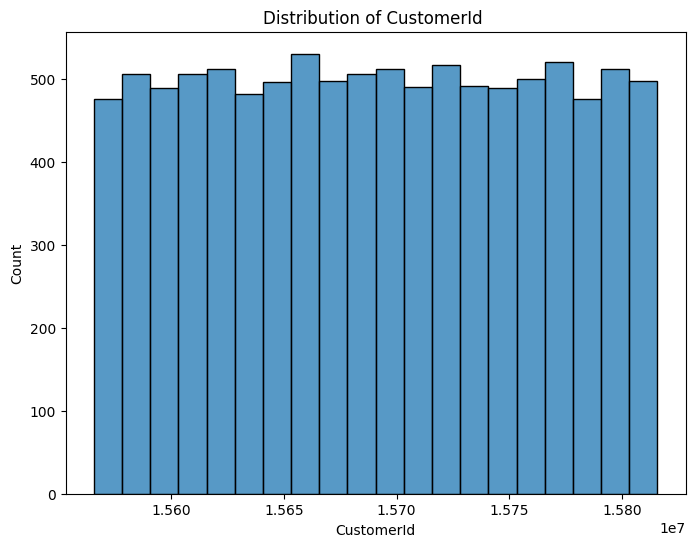

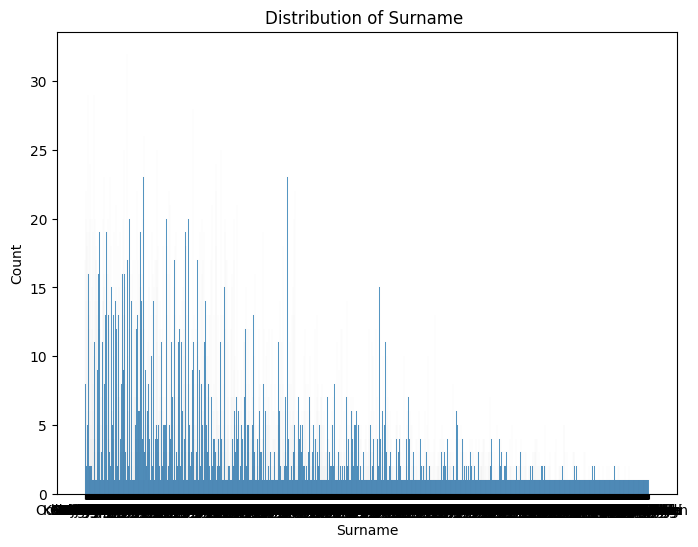

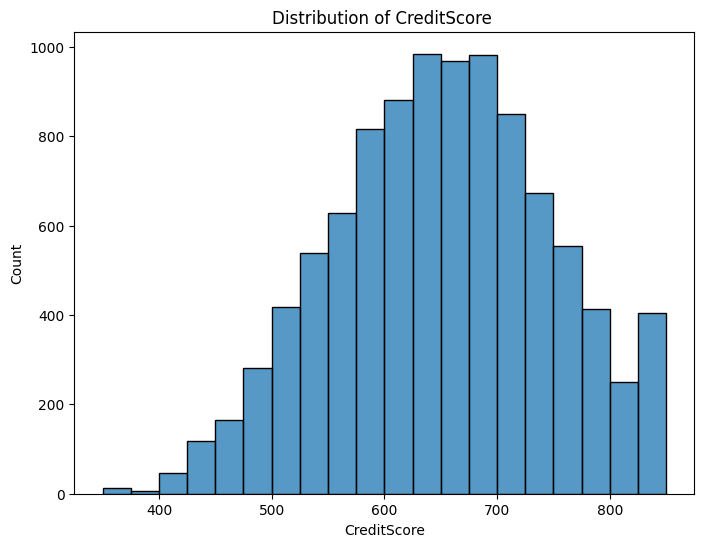

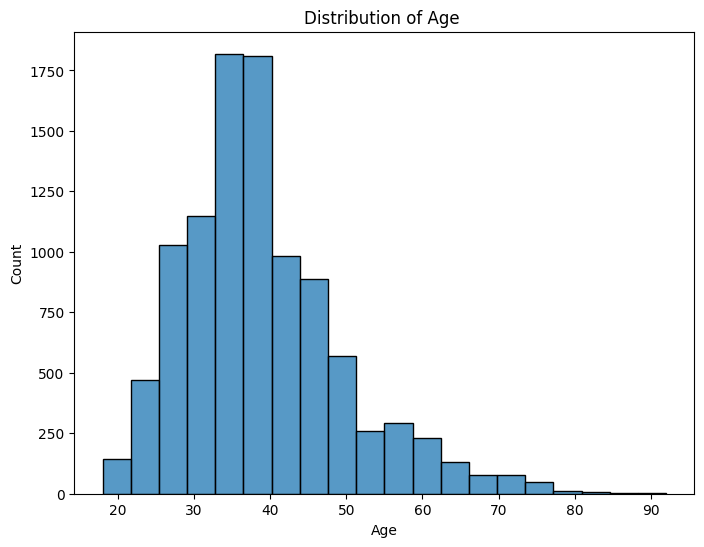

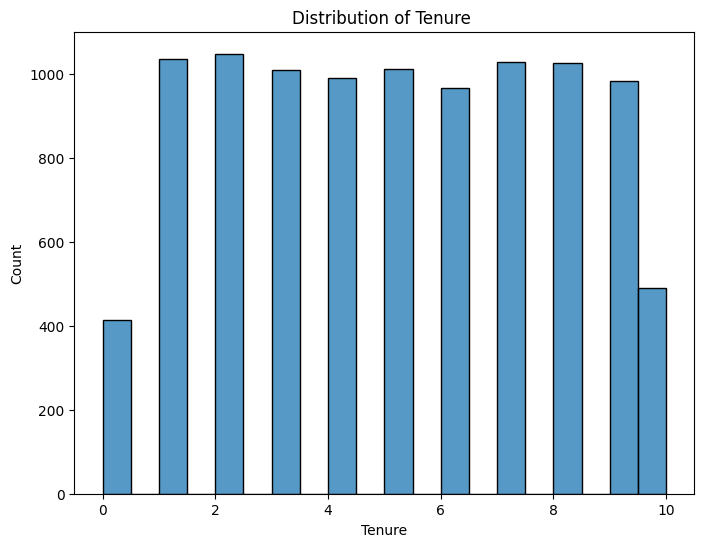

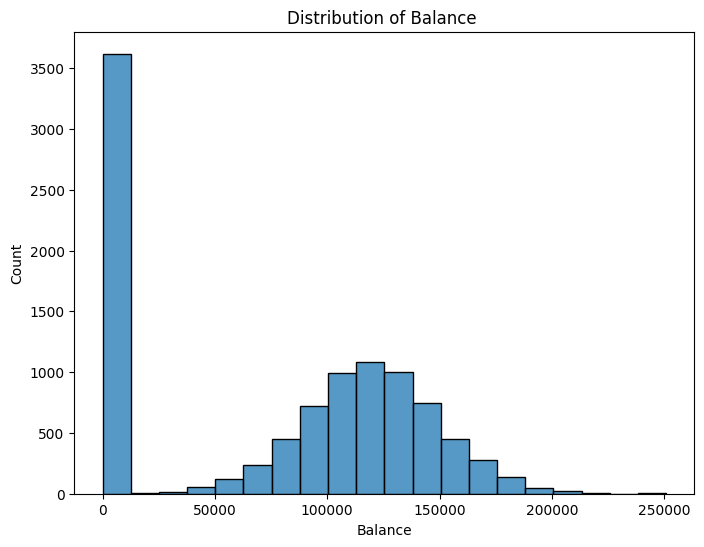

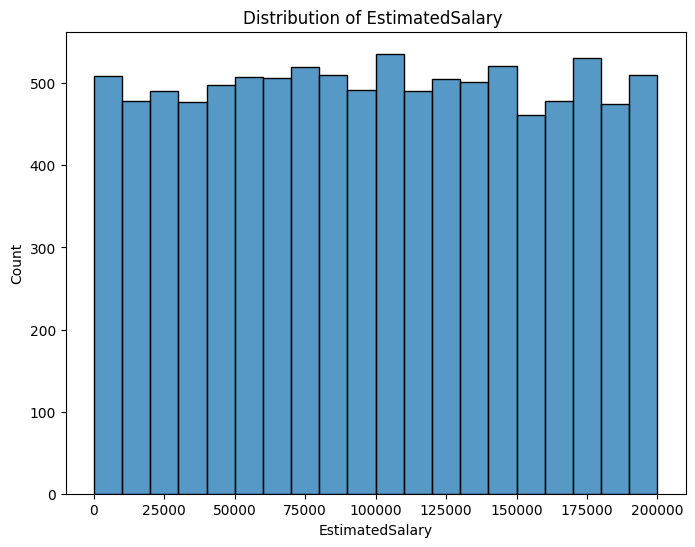

In [10]:
for i in num_var:
    plt.figure(figsize = (8,6))
    plt.title(f'Distribution of {i} ')
    sns.histplot(data = data , x = i, bins = 20)
    plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in ['Gender', 'Geography']:
    data[i] = encoder.fit_transform(data[[i]])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
for i in data.columns: 
    print(f"{ i } : {data[i].max()} ")

RowNumber : 10000 
CustomerId : 15815690 
Surname : Zuyeva 
CreditScore : 850 
Geography : 2 
Gender : 1 
Age : 92 
Tenure : 10 
Balance : 250898.09 
NumOfProducts : 4 
HasCrCard : 1 
IsActiveMember : 1 
EstimatedSalary : 199992.48 
Exited : 1 


In [13]:
data[cat_var].describe()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.746300,0.545700,1.530200,0.70550,0.515100,0.203700
std,0.827529,0.497932,0.581654,0.45584,0.499797,0.402769
min,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000
75%,1.000000,1.000000,2.000000,1.00000,1.000000,0.000000
max,2.000000,1.000000,4.000000,1.00000,1.000000,1.000000


In [14]:
data[num_var].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [15]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
